# Домашнее задание по статистическому анализу на python

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [170]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

### 1. Посмотреть первые несколько рядов таблицы

In [171]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


### 2. Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

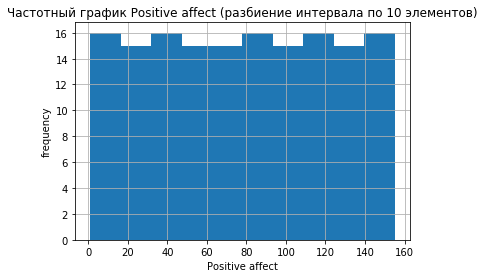

In [174]:
# построим частотный график для показателей столбца Positive affect
plt.hist(df['Positive affect'], 10)
plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

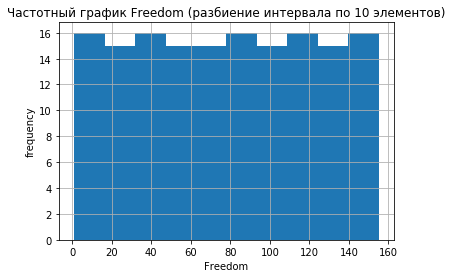

In [173]:
# построим частотный график для показателей столбца Freedom
plt.hist(df['Freedom'], 10)
plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Оба графика демонстрируют равномерное распределение

### 3. Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

1) Математическое ожидание

In [175]:
# математическое ожидание методом mean найти не удается
statistics.mean(df['Freedom'])

nan

In [176]:
# похоже, в выборке есть отсутствующие значения (выбросы), посмотрим, сколько их
df['Freedom'].isnull().sum()

1

In [177]:
# уберем отсутствующие значения и проверим, что длина колонки Freedom сократилась только на 1 элемент
df1 = df['Freedom'].dropna()
len(df1)

155

In [178]:
# найдем математическое ожидание
print('Математическое ожидание: ', statistics.mean(df1))

Математическое ожидание:  78.0


2) Медиана

In [179]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


3) Мода

In [180]:
# методом mode моду найти не удается
print('Мода: ', statistics.mode(df1))

StatisticsError: no unique mode; found 155 equally common values

In [181]:
# действительно, если попытаться создать словарь, получим 156 уникальных ключей моды
freedom_counts = {}
for p in (df['Freedom']):
    if p not in freedom_counts:
        freedom_counts[p] = 1
    else:
        freedom_counts[p] += 1
print(len(freedom_counts))

156


Вывод: для данного списка значений столбца Freedom нет моды

4) Минимум и максимум, размах

In [182]:
print('Минимум: ', min(df['Freedom']))

Минимум:  1.0


In [183]:
print('Максимум: ', max(df['Freedom']))

Максимум:  155.0


In [184]:
print('Размах: ', max(df['Freedom']) - min(df['Freedom']))

Размах:  154.0


5) Выбросы

Одним из выбросов, как уже было выяснено при подсчете математического ожидания, является отсутствующее значение. Кроме того, размах выборки очень близок к максимальному значению. Построим точечный график без учета отсутствующего значения для визуализации возможных выбросов.

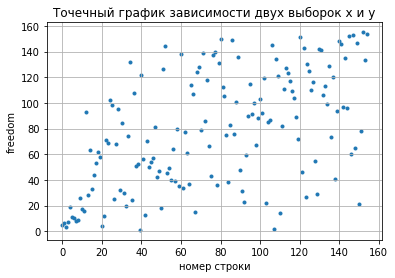

In [185]:
x = [i for i in range(0, len(df1))]
y = df1

plt.xlabel('номер строки')
plt.ylabel('freedom')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

По графику видно, что каких-либо других выбросов в выборке нет, на графике достаточно равномерно расположены все значения столбца Freedom

6) Стандартное отклонение и дисперсия

In [186]:
# для подсчета стандартного отклонения и дисперсии возьмем выборку без выброса (пустого значения)
print('Стандартное отклонение: ', statistics.pstdev(df1))
print('Дисперсия: ', statistics.pvariance(df1))

Стандартное отклонение:  44.74371464239419
Дисперсия:  2002.0


### 4. Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [187]:
# для постороения графика найдем строку со значением NaN в столбце Freedom
df.loc[df['Freedom'].isnull(), :]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [188]:
# исключим эту страну из выборки
df = df.loc[df['Country (region)']!= 'Qatar', :]

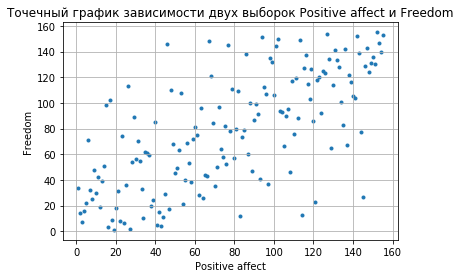

In [189]:
x = df['Positive affect']
y = df['Freedom']

plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.title('Точечный график зависимости двух выборок Positive affect и Freedom')
plt.grid(True)
plt.scatter(x, y, marker='.')

In [191]:
# посчитаем коэффициент корреляции Пирсона
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Positive affect'], df['Freedom'])
print('Коэффициент корреляции Пирсона: ', corr)

Коэффициент корреляции Пирсона:  0.6817698430601656


Вывод: и график (стремится вправо-вверх), и положительное значение коэффициента Пирсона демонстрируют положительную линейную зависимость между двумя показателями выборки.

### 5. Нормализовать данные колонки Freedom (централизация + масштабирование)

In [192]:
# найдем среднее значение выборки по столбцу Freedom (центрируем)
freedom = df['Freedom']
print(statistics.mean(freedom))

78.0


In [193]:
# нормализуем выборку
freedom_norm = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_norm))

0.0


In [194]:
min(freedom_norm)

-77.0

In [195]:
max(freedom_norm)

77.0

In [196]:
# масштабируем выборку к виду (-1,1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_norm).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


### 6. Построить матрицу корреляций для всех колонок таблицы

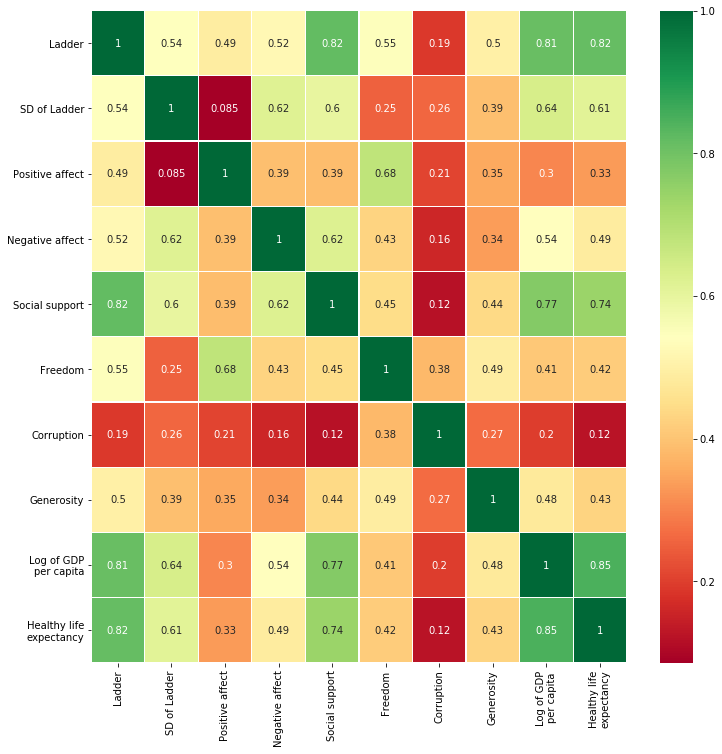

In [197]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### 7. Загрузить следующую таблицу: 

In [198]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:5]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### 7.1 Сделать частотный график колонки AveragePrice. Какое это распределение?

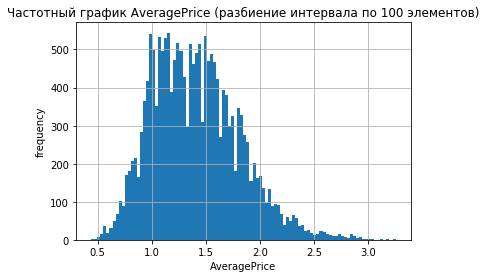

In [199]:
plt.hist(df['AveragePrice'], 100)
plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

График демонстрирует распределение, близкое к нормальному

### 7.2 Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [200]:
# нормализуем значения
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


In [201]:
av4046 = df_norm[0]
av_price = df_norm[1]

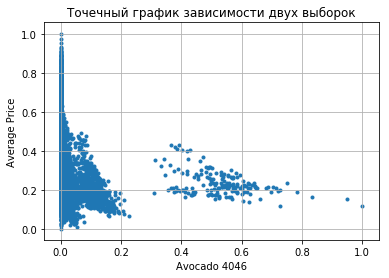

In [202]:
# построим график
x = av4046
y = av_price

plt.xlabel('Avocado 4046')
plt.ylabel('Average Price')
plt.title('Точечный график зависимости двух выборок')
plt.grid(True)
plt.scatter(x, y, marker='.')

In [203]:
corr, p_value = pearsonr(av4046, av_price)
print(corr)

-0.2083170484878848


Коэффициент корреляции отрицательный и небольшой, что означает некоторую отрицательную линейную зависимость между двумя выборками. Отсюда, цена на сорт авокадо 4046 не оказывает значительного влияния на среднюю цену авокадо.